# Regression model that predicts closing price of Bitcoin's future price movements.

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import tensorflow as tf

In [3]:
columns = ['Unix', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume BTC', 'Volume USD']

### Loading Data

In [4]:
df=pd.read_csv("Gemini_BTCUSD.csv",names=columns,skiprows=1,low_memory=False)

In [5]:
df.head()

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
1,1690239600000,2023-07-24 23:00:00,BTC/USD,29161.82,29199.99,29161.82,29180.0,5.22810864,152556.2101152
2,1690236000000,2023-07-24 22:00:00,BTC/USD,29167.91,29192.63,29139.17,29161.82,37.30839835,1087980.797170997
3,1690232400000,2023-07-24 21:00:00,BTC/USD,29149.01,29186.0,29118.2,29167.91,4.42906079,129186.44650724891
4,1690228800000,2023-07-24 20:00:00,BTC/USD,29111.09,29154.63,29097.24,29149.01,11.999466,349772.55442865996


In [6]:
df.shape

(68313, 9)

In [7]:
df.tail()

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
68308,1444323600,2015-10-08 17:00:00,BTC/USD,244.25,244.99,244.02,244.99,3.920632003,960.5156344149701
68309,1444320000,2015-10-08 16:00:00,BTC/USD,244.92,244.92,244.25,244.25,3.89525246,951.415413355
68310,1444316400,2015-10-08 15:00:00,BTC/USD,245.0,245.0,244.92,244.92,3.016925828,738.90547379376
68311,1444312800,2015-10-08 14:00:00,BTC/USD,245.0,245.0,244.5,245.0,4.453648931,1091.143988095
68312,1444309200,2015-10-08 13:00:00,BTC/USD,0.0,245.0,0.0,245.0,0.60665438,148.6303231


In [8]:
df.describe()

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
count,68313,68313,68313,68313,68313,68313,68313,68313,68313
unique,68313,68313,2,62440,59972,60201,62439,66789,67163
top,unix,date,BTC/USD,4371.25,574.99,4371.25,4371.25,0.0,0.0
freq,1,1,68312,28,33,28,28,1150,1150


## Data Preprocessing

In [11]:
df=df[df['Date']!='data']

In [12]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Unix'] = pd.to_numeric(df['Unix'], errors='coerce')

In [13]:
for col in ['Open', 'High', 'Low', 'Close', 'Volume BTC', 'Volume USD']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(68312, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68312 entries, 1 to 68312
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unix        68312 non-null  float64       
 1   Date        68312 non-null  datetime64[ns]
 2   Symbol      68312 non-null  object        
 3   Open        68312 non-null  float64       
 4   High        68312 non-null  float64       
 5   Low         68312 non-null  float64       
 6   Close       68312 non-null  float64       
 7   Volume BTC  68312 non-null  float64       
 8   Volume USD  68312 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 5.2+ MB


### Plot 1

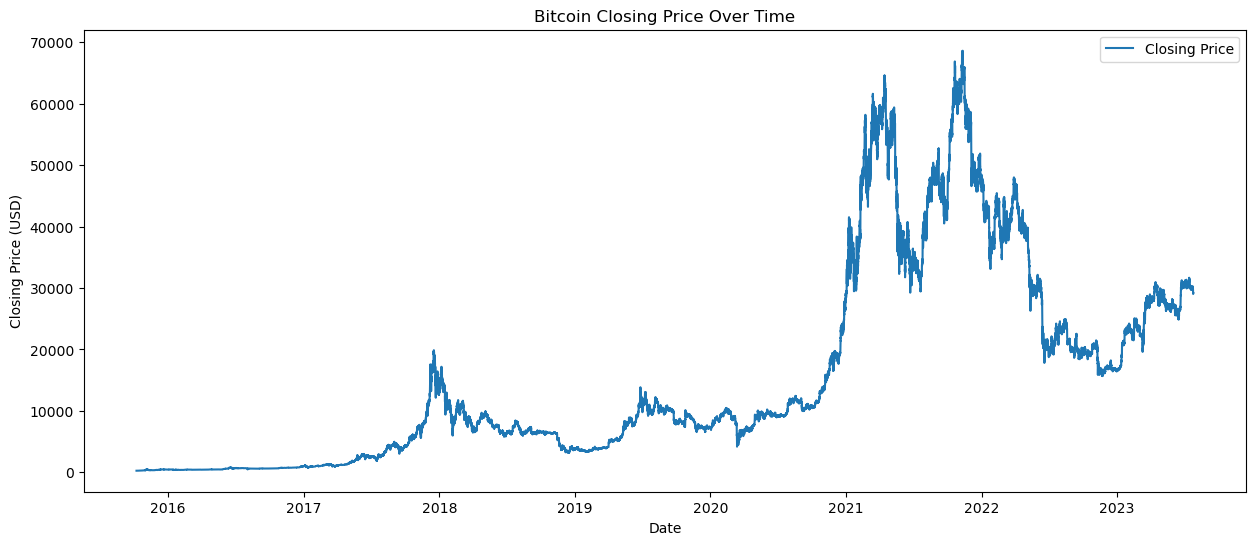

In [17]:
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

### Plot 2

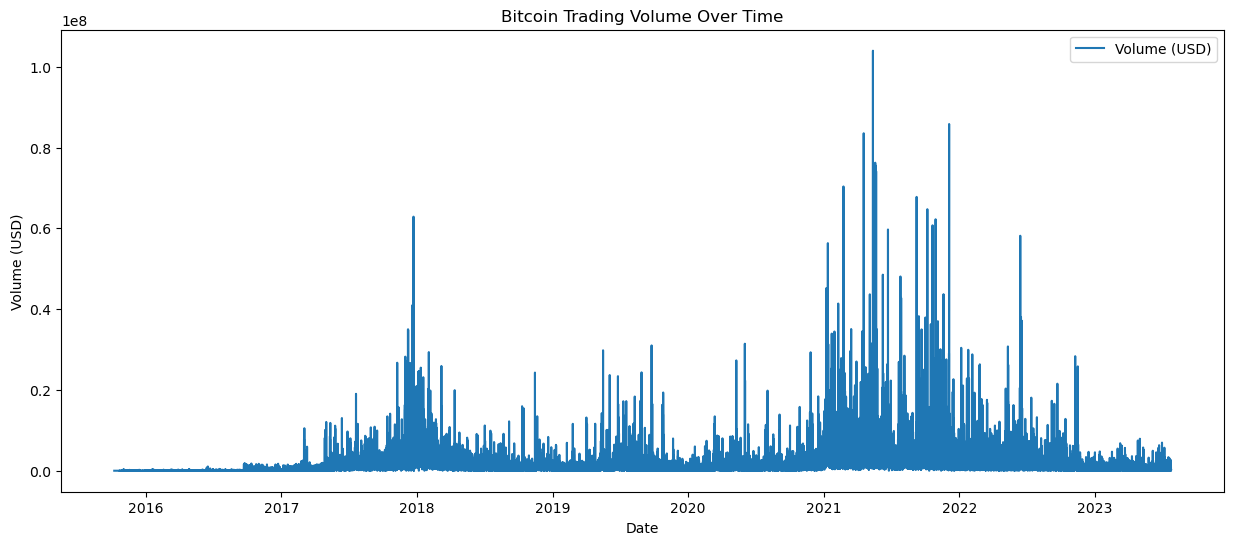

In [18]:
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Volume USD'], label='Volume (USD)')
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.legend()
plt.show()

In [19]:
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

In [20]:
correlation_matrix

,Unix,Open,High,Low,Close,Volume BTC,Volume USD
Unix,1.000000,0.571338,0.570877,0.571889,0.571346,-0.222004,0.094314
Open,0.571338,1.000000,0.999966,0.999947,0.999940,-0.121624,0.348987
High,0.570877,0.999966,1.000000,0.999919,0.999967,-0.120011,0.352136
Low,0.571889,0.999947,0.999919,1.000000,0.999956,-0.124272,0.343319
Close,0.571346,0.999940,0.999967,0.999956,1.000000,-0.121951,0.348307
Volume BTC,-0.222004,-0.121624,-0.120011,-0.124272,-0.121951,1.000000,0.530672
Volume USD,0.094314,0.348987,0.352136,0.343319,0.348307,0.530672,1.000000


### Correlation Matrix

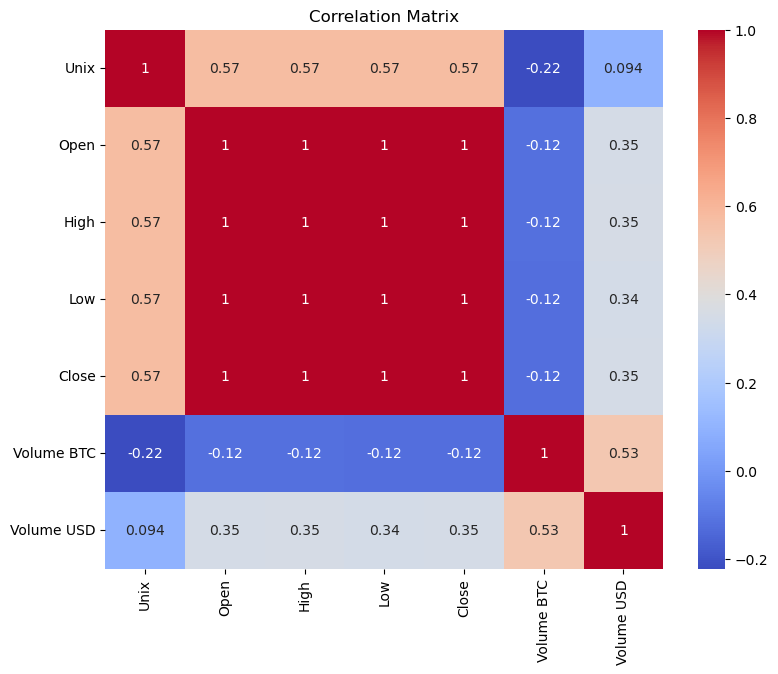

In [21]:
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Selecting Features and Target

In [32]:
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA30'] = df['Close'].rolling(window=30).mean()
df['Lag1'] = df['Close'].shift(1)
df['Lag3'] = df['Close'].shift(3)
df['Lag7'] = df['Close'].shift(7)
df.dropna(inplace=True)

features = ['Open', 'High', 'Low', 'Volume BTC', 'Volume USD', 'MA7', 'MA30', 'Lag1', 'Lag3', 'Lag7']
target = 'Close'

from sklearn.model_selection import train_test_split

#Feature matrix X
X = df[features]
#Target Vector Y
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Plot 3

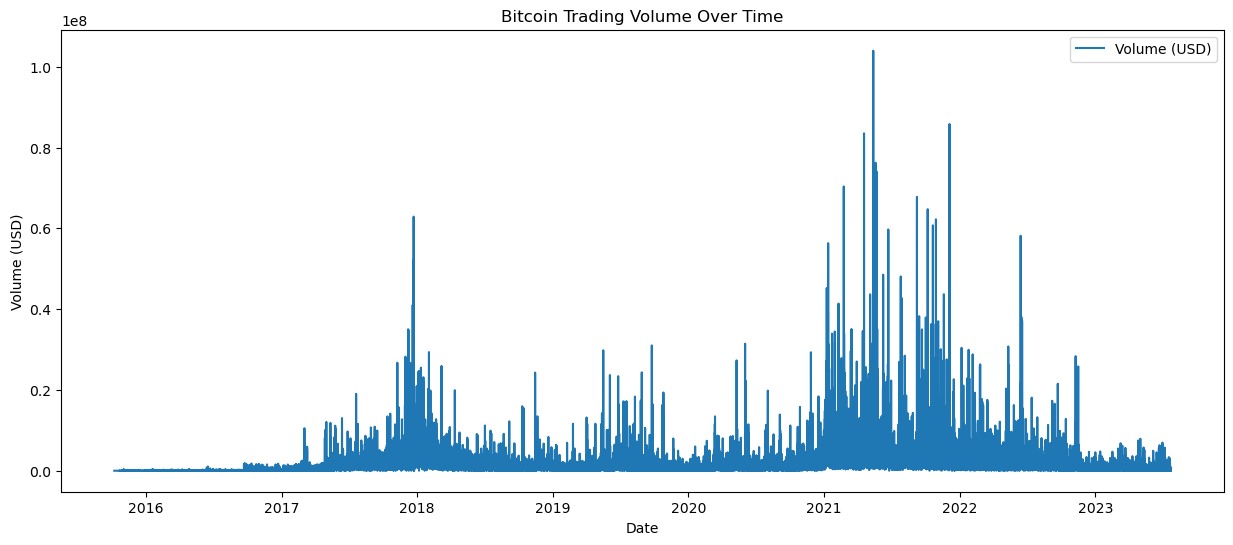

In [23]:
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Volume USD'], label='Volume (USD)')
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.legend()
plt.show()

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42)

### Training the Model

In [25]:
model.fit(X_train, y_train)
#Prediction on Testing Set
y_pred = model.predict(X_test)

### Model Evaluation

In [26]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
r2 = r2_score(y_test, y_pred)

MSE: 7116.964309609702
MAE: 37.43214239641123


## Actual vs Predicted Bitcoin Price

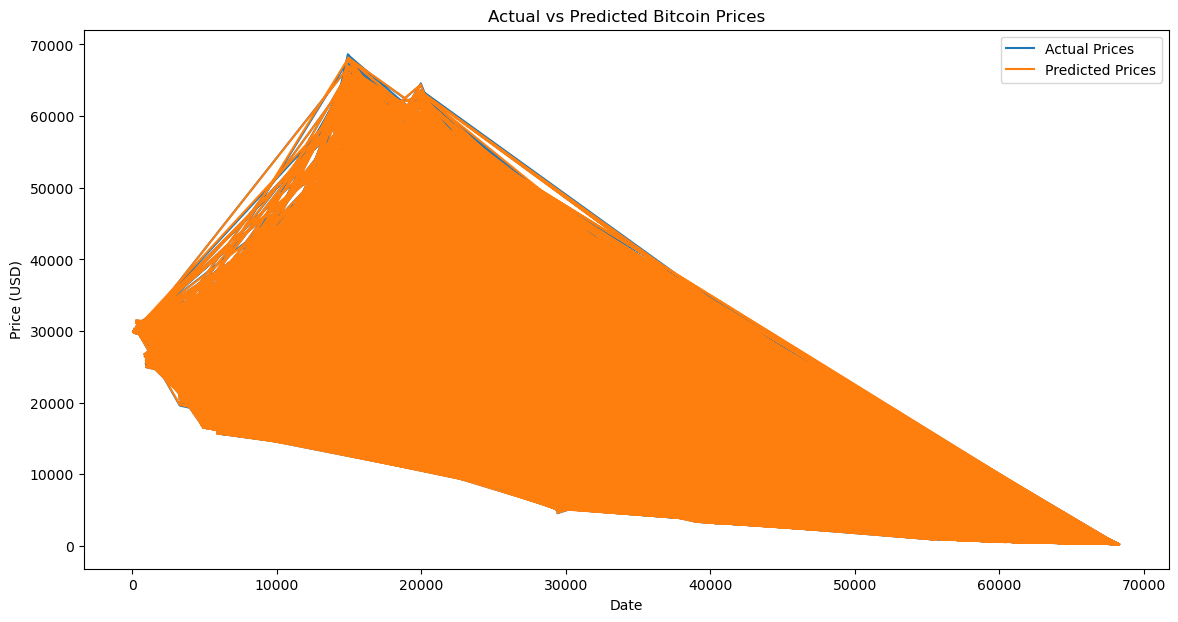

In [27]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices')
plt.title('Actual vs Predicted Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [28]:
y_pred

array([  729.9446, 21995.1767, 63663.1782, ...,  1181.6879, 29420.7691,
         461.7883])

In [29]:
y_test

58593      739.31
3318     22020.08
14862    63922.19
38989     3588.06
1195     26816.57
           ...   
17017    47115.73
10538    28741.13
55823     1183.04
10105    29451.76
66613      463.72
Name: Close, Length: 13657, dtype: float64

## Accuracy Calculation

In [33]:
accuracy = 1 - (mae / y_test.mean())

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')
print(f'Accuracy: {accuracy*100:.2f}%')

MAE: 37.43214239641123
MSE: 7116.964309609702
R2: 0.9999726829034382
Accuracy: 99.76%
